In [8]:
import pandas as pd
df = pd.read_csv("german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [10]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

### since both columns are categorical we apply mode

In [11]:
df["Saving accounts"] = df["Saving accounts"].fillna(df["Saving accounts"].mode()[0])

In [12]:
df["Checking account"] = df["Checking account"].fillna(df["Checking account"].mode()[0])

In [13]:
df.duplicated().sum()
df = df.drop_duplicates()

In [14]:
df.shape

(1000, 10)

In [15]:
num = df.select_dtypes(include=["int64", "float64"]).columns
cat = df.select_dtypes(include=["object"]).columns

## univariate analysis

In [16]:
df[num].describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [17]:
for col in num:
    print(col)
    print(df[col].unique()[:10])

Unnamed: 0
[0 1 2 3 4 5 6 7 8 9]
Age
[67 22 49 45 53 35 61 28 25 24]
Job
[2 1 3 0]
Credit amount
[1169 5951 2096 7882 4870 9055 2835 6948 3059 5234]
Duration
[ 6 48 12 42 24 36 30 15  9 10]


In [18]:
for col in cat:
    print(col)
    print(df[col].unique())

Sex
['male' 'female']
Housing
['own' 'free' 'rent']
Saving accounts
['little' 'quite rich' 'rich' 'moderate']
Checking account
['little' 'moderate' 'rich']
Purpose
['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


## OUTLIERS

In [31]:
import numpy as np

for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])


## One-Hot Encoding

In [19]:
df_encoded = pd.get_dummies(df, columns=cat, drop_first=True)

In [20]:
df_encoded.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False
1,1,22,2,5951,48,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False
2,2,49,1,2096,12,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,3,45,2,7882,42,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,4,53,2,4870,24,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False


## bivariate analysis

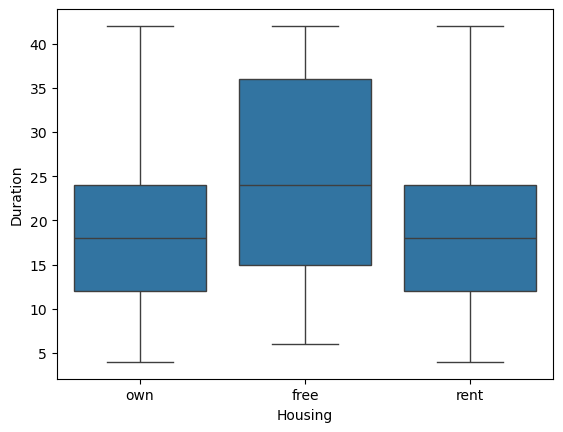

In [36]:
sns.boxplot(x="Housing", y="Duration", data=df)
plt.show()


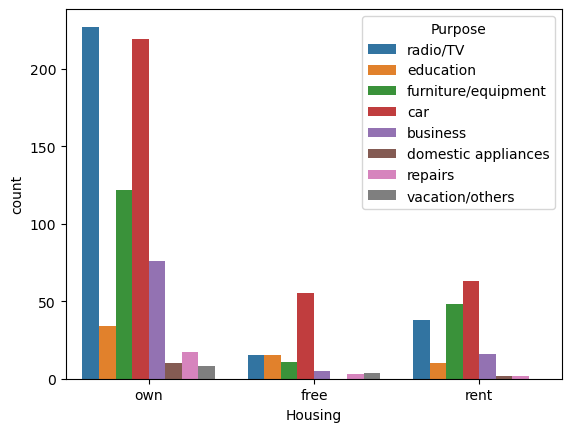

In [35]:
sns.countplot(x="Housing", hue="Purpose", data=df)
plt.show()


## multivariate analysis

In [ ]:
df_encoded.corr()

,Unnamed: 0,Age,Job,Credit amount,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Unnamed: 0,1.000000,-0.010096,-0.027345,0.013488,0.030788,-0.001693,-0.013244,0.025442,-0.008428,-0.013110,-0.033723,-0.059437,-0.013238,0.056976,-0.000223,-0.030881,-0.003846,-0.017483,-0.012564,-0.028569
Age,-0.010096,1.000000,0.015673,0.032716,-0.036136,0.161694,0.006553,-0.212620,-0.075302,0.030988,0.032007,-0.078121,0.037504,0.099919,-0.012562,0.060390,-0.127657,-0.046401,0.039567,0.042365
Job,-0.027345,0.015673,1.000000,0.285385,0.210910,0.070298,-0.059393,-0.039195,0.004472,-0.037499,-0.017128,-0.004059,-0.050099,0.036762,-0.025979,-0.021672,0.013422,-0.027683,-0.092751,0.100544
Credit amount,0.013488,0.032716,0.285385,1.000000,0.624984,0.093482,-0.117497,-0.024611,0.013546,-0.064256,-0.055542,0.119612,-0.100510,0.125575,-0.069268,-0.034796,-0.034037,-0.173203,-0.028875,0.192893
Duration,0.030788,-0.036136,0.210910,0.624984,1.000000,0.081432,-0.075169,-0.064417,0.051587,-0.040257,-0.048261,0.089452,-0.076455,-0.005320,-0.037212,-0.025450,-0.062804,-0.044319,-0.022549,0.104516
Sex_male,-0.001693,0.161694,0.070298,0.093482,0.081432,1.000000,0.119638,-0.222845,-0.000498,0.031414,-0.041673,-0.012726,-0.004183,0.047893,-0.045275,-0.052397,-0.100467,0.008668,0.026828,0.014297
Housing_own,-0.013244,0.006553,-0.059393,-0.117497,-0.075169,0.119638,1.000000,-0.735968,-0.017738,0.000737,0.028707,0.001012,0.018934,-0.099526,0.029317,-0.075684,-0.040496,0.134705,0.019803,-0.011288
Housing_rent,0.025442,-0.212620,-0.039195,-0.024611,-0.064417,-0.222845,-0.735968,1.000000,0.030578,0.007762,0.004979,-0.000888,-0.035183,0.014773,-0.003546,-0.006211,0.105700,-0.070414,-0.034465,-0.051460
Saving accounts_moderate,-0.008428,-0.075302,0.004472,0.013546,0.051587,-0.000498,-0.017738,0.030578,1.000000,-0.087866,-0.076089,0.143136,-0.020162,0.029852,-0.007131,-0.015038,-0.082398,-0.013482,0.016463,0.023084
Saving accounts_quite rich,-0.013110,0.030988,-0.037499,-0.064256,-0.040257,0.031414,0.000737,0.007762,-0.087866,1.000000,-0.058224,-0.055198,0.000525,-0.028134,0.047023,-0.012524,0.006382,0.049134,-0.010831,-0.028577


<Axes: >

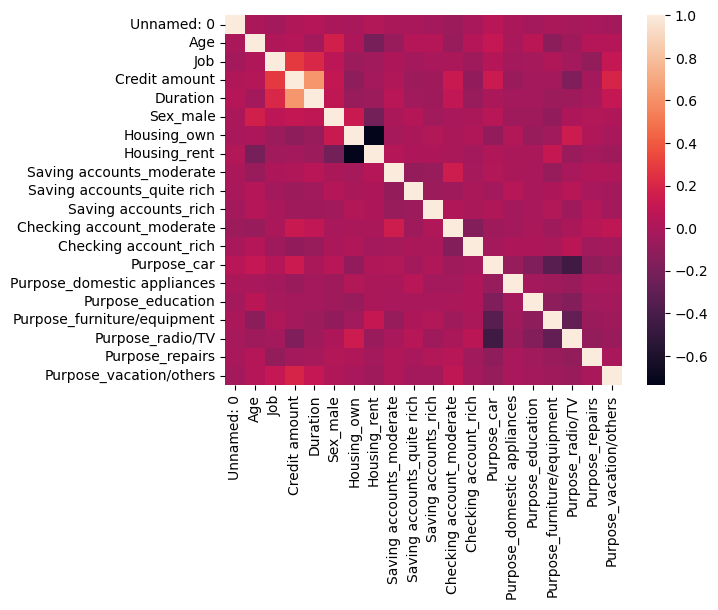

In [ ]:
import seaborn as sns
sns.heatmap(df_encoded.corr())

## hypothesis tests 

In [27]:
from statsmodels.stats.weightstats import ztest

male = df[df["Sex"]=="male"]["Age"]
female = df[df["Sex"]=="female"]["Age"]

z_stat, p_val = ztest(male, female)
print(z_stat, p_val)

if p_val < 0.05:
    print("Reject H0 → Age differs between males and females")
else:
    print("Fail to Reject H0 → No difference in age")


5.176216565640507 2.264306109125189e-07
Reject H0 → Age differs between males and females


In [28]:
from scipy.stats import ttest_ind

male_credit = df[df["Sex"]=="male"]["Credit amount"]
female_credit = df[df["Sex"]=="female"]["Credit amount"]

t_stat, p_value = ttest_ind(male_credit, female_credit, nan_policy='omit')

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H0 → Significant difference in credit amount")
else:
    print("Fail to Reject H0 → No significant difference")


T-Statistic: 2.966205787131036
P-Value: 0.0030868064209731453
Reject H0 → Significant difference in credit amount


In [29]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df["Housing"], df["Purpose"])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-Square:", chi2)
print("P-Value:", p)

if p < 0.05:
    print("Reject H0 → Housing and Purpose are dependent")
else:
    print("Fail to Reject H0 → No relationship")


Chi-Square: 65.01830380326827
P-Value: 1.518343389096326e-08
Reject H0 → Housing and Purpose are dependent


In [30]:
from scipy.stats import f_oneway

g0 = df[df["Job"]==0]["Credit amount"]
g1 = df[df["Job"]==1]["Credit amount"]
g2 = df[df["Job"]==2]["Credit amount"]
g3 = df[df["Job"]==3]["Credit amount"]

f_stat, p_value = f_oneway(g0, g1, g2, g3)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("Reject H0 → Credit amount differs across job types")
else:
    print("Fail to Reject H0 → No difference between job categories")


F-Statistic: 41.85773760572267
P-Value: 1.7714719609193288e-25
Reject H0 → Credit amount differs across job types


## Export cleaned dataset

In [ ]:
df_encoded.to_csv("credit_cleaned.csv", index=False)